In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("../Data/Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1980,1981,15775880,McElyea,554,France,Female,30,9,0.00,2,1,1,40320.30,0
5042,5043,15593468,Findlay,850,France,Female,33,3,0.00,2,1,1,11159.19,0
8880,8881,15603764,Chang,560,France,Male,49,4,0.00,1,1,1,100075.10,1
4736,4737,15718773,Pisano,638,France,Female,32,0,0.00,2,1,0,160129.99,0
282,283,15643024,Huang,479,Germany,Male,35,4,138718.92,1,1,1,47251.79,1


In [3]:
df.shape

(10000, 14)

# <span style='color:red'>Data Cleaning</span>

### *First, let's check the N/A values*

In [4]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### *There is no NA value in the dataset*
### *Now, let's drop the irrelevant columns*

In [5]:
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6769,762,France,Female,44,7,159316.64,1,0,0,24780.13,0
8602,656,France,Male,63,8,0.00,2,0,1,57014.43,0
8338,602,Spain,Female,42,1,138912.17,1,1,1,139494.75,0
3165,651,France,Female,39,6,0.00,1,1,0,24176.44,0
3865,623,France,Male,40,6,0.00,2,1,1,66119.07,0


### *Data Visualization*

In [6]:
df.groupby('Exited').mean(numeric_only=True)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


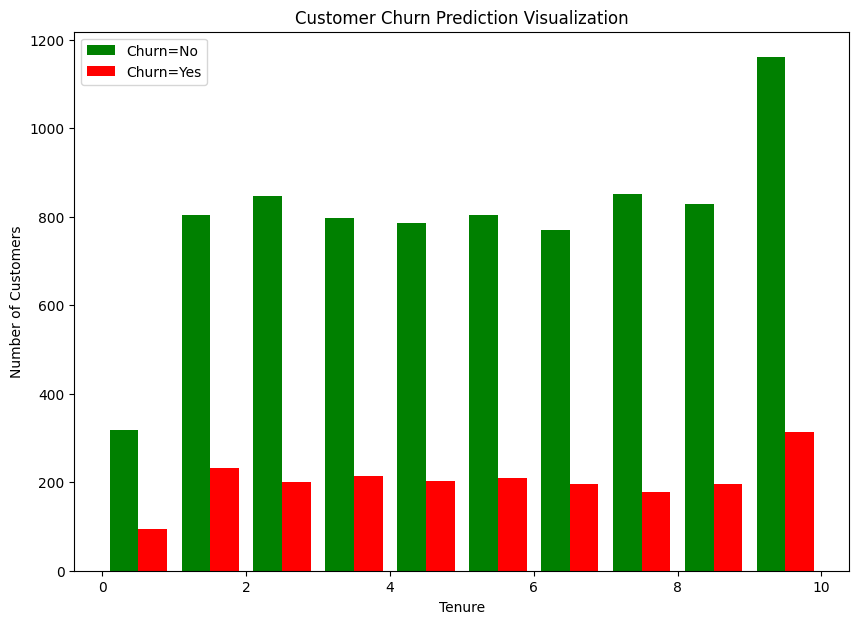

In [7]:
tenure_exited_no = df[df['Exited']==0].Tenure
tenure_exited_yes = df[df['Exited']==1].Tenure
plt.figure(figsize=(10,7))
plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")
plt.hist([tenure_exited_no, tenure_exited_yes], color=['green', 'red'], label=['Churn=No', 'Churn=Yes'])
plt.legend()
plt.show()

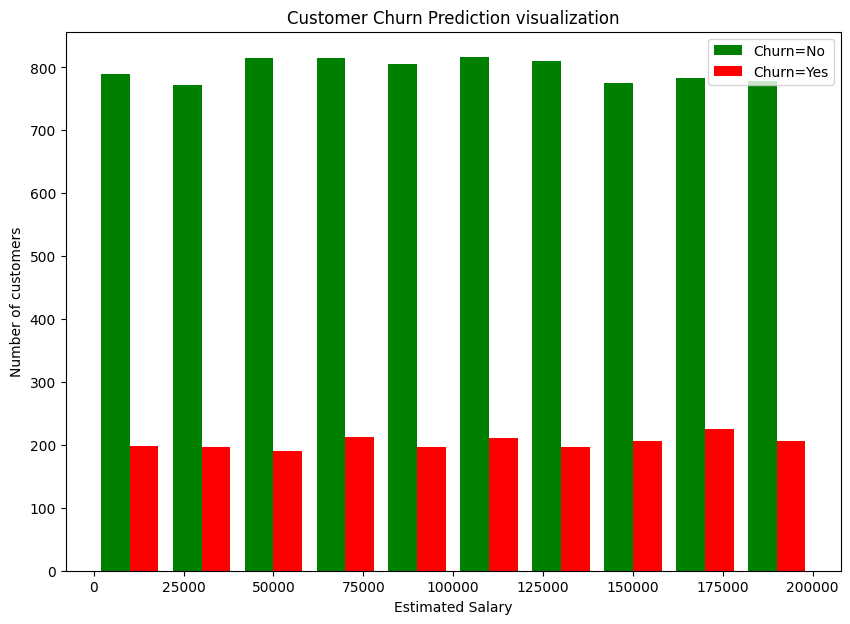

In [8]:
salary_exited_no = df[df['Exited']==0].EstimatedSalary
salary_exited_yes = df[df['Exited']==1].EstimatedSalary
plt.figure(figsize=(10,7))
plt.hist([salary_exited_no, salary_exited_yes], color=['green', 'red'], label=['Churn=No', 'Churn=Yes'])
plt.title('Customer Churn Prediction visualization')
plt.xlabel('Estimated Salary')
plt.ylabel('Number of customers')
plt.legend()
plt.show()

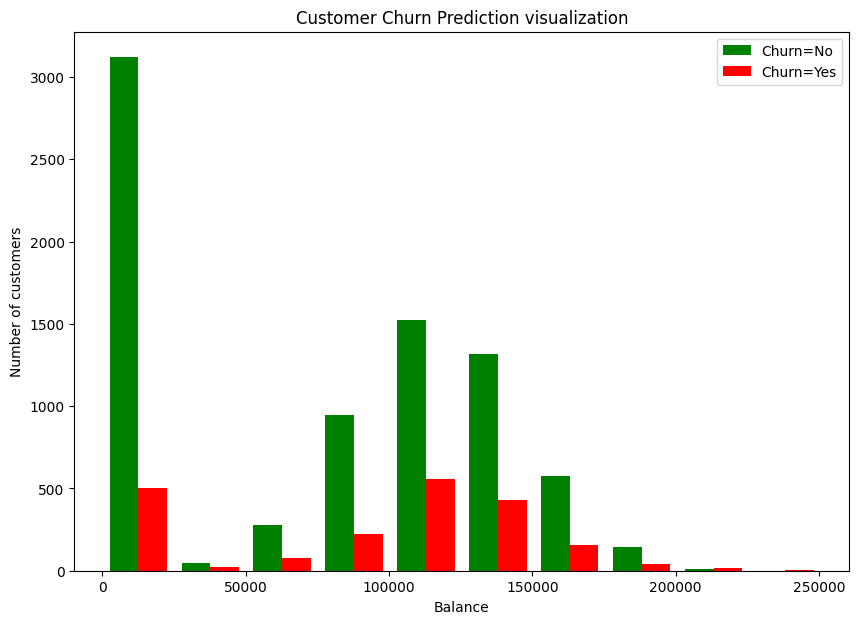

In [9]:
balance_exited_no = df[df['Exited']==0].Balance
balance_exited_yes = df[df['Exited']==1].Balance
plt.figure(figsize=(10,7))
plt.hist([balance_exited_no, balance_exited_yes], color=['green', 'red'], label=['Churn=No', 'Churn=Yes'])
plt.title('Customer Churn Prediction visualization')
plt.xlabel('Balance')
plt.ylabel('Number of customers')
plt.legend()
plt.show()

### *Let's handle the categorical data columns*

In [10]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [11]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtype=='object':
            print(f"{column}  :  {df[column].unique()}")

In [12]:
print_unique_col_values(df)

Geography  :  ['France' 'Spain' 'Germany']
Gender  :  ['Female' 'Male']


In [13]:
categorical_columns = ['Geography','Gender']

In [14]:
df['Gender'] = df['Gender'].map({'Female':0, 'Male':1})

In [15]:
print_unique_col_values(df)

Geography  :  ['France' 'Spain' 'Germany']


# *One Hot Encoding*

In [16]:
df2 = pd.get_dummies(df, columns=['Geography'])
df2.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [17]:
df2.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
2211,717,1,40,0,98241.04,1,1,0,110887.14,0,True,False,False
9839,484,1,41,5,0.00,1,1,1,74267.35,0,True,False,False
3317,779,1,71,3,0.00,2,1,1,146895.36,1,True,False,False
4235,595,1,29,6,150685.79,1,1,0,87771.06,0,True,False,False
1388,630,0,40,0,118633.08,1,0,1,60032.46,1,True,False,False


In [18]:
df2.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France        bool
Geography_Germany       bool
Geography_Spain         bool
dtype: object

# *Scalling*

In [19]:
columns_to_scale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [21]:
df2[columns_to_scale] = scaler.fit_transform(df2[columns_to_scale])
df2.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
6573,0.594,1,0.229730,0.3,0.766877,1,1,1,0.200688,0,False,True,False
869,0.170,1,0.243243,0.4,0.000000,1,1,1,0.985112,0,True,False,False
909,0.912,1,0.094595,0.7,0.000000,2,1,0,0.092260,0,False,False,True
1556,1.000,0,0.148649,1.0,0.000000,2,1,1,0.474063,0,False,False,True
8071,0.518,1,0.405405,0.1,0.430530,3,1,1,0.922653,1,True,False,False


In [22]:
X = df2.drop('Exited', axis=1)
y = df2['Exited']

In [23]:
X.shape

(10000, 12)

In [24]:
y.shape

(10000,)

In [25]:
df2.shape

(10000, 13)

## *Train Test Split*

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69) 

In [27]:
X_train.shape

(8000, 12)

In [28]:
X_test.shape

(2000, 12)

# *Model Training*

In [29]:
model = keras.Sequential([
    keras.Input(shape=(12,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
model.fit(X_train, y_train, epochs=250)

Epoch 1/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 886us/step - accuracy: 0.8003 - loss: 0.5157
Epoch 2/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - accuracy: 0.7953 - loss: 0.4705
Epoch 3/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.8026 - loss: 0.4497
Epoch 4/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.8130 - loss: 0.4334
Epoch 5/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.8181 - loss: 0.4183
Epoch 6/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - accuracy: 0.8178 - loss: 0.4122
Epoch 7/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.8326 - loss: 0.3999
Epoch 8/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - accuracy: 0.8397 - loss: 0.3839
Epoch 9/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.8407 - loss: 0.3819
Epoch 10/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - accuracy: 0.8438 - loss: 0.3743
Epoch 11/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.8419 - loss: 0.3745
Epoch 12/250
250/25

In [31]:
model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.8619 - loss: 0.3375


[0.352095365524292, 0.8585000038146973]

In [32]:
yp = model.predict(X_test)
yp[:10]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


array([[0.6914213 ],
       [0.05926648],
       [0.8613148 ],
       [0.04835925],
       [0.08459204],
       [0.08255646],
       [0.07401027],
       [0.48065245],
       [0.7646588 ],
       [0.01282013]], dtype=float32)

In [33]:
y_test[:10]

5256    1
7272    0
1323    1
4924    0
5845    0
4155    0
7388    0
6041    0
1825    1
349     0
Name: Exited, dtype: int64

In [34]:
y_pred = []
for val in yp:
    if val>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [35]:
y_pred[:10]

[1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

## Classification Report and Confusion Matrix

In [37]:
from sklearn.metrics import confusion_matrix, classification_report
print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1578
           1       0.76      0.48      0.59       422

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



Text(70.72222222222221, 0.5, 'True')

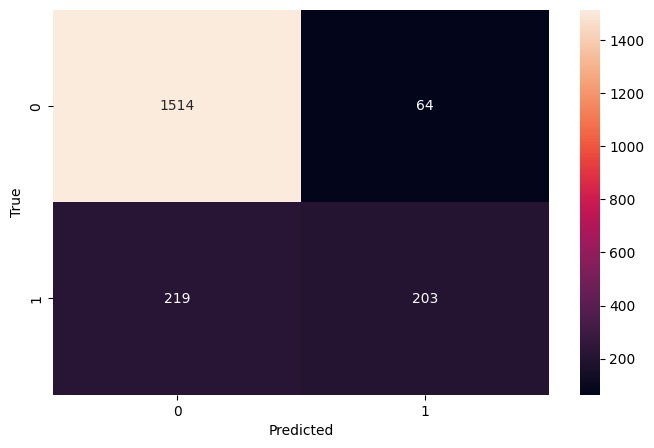

In [38]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(8,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

In [39]:
print(cm)

tf.Tensor(
[[1514   64]
 [ 219  203]], shape=(2, 2), dtype=int32)


## Let's analyze accuracy, precision, recall and f1_score
#### The confusion matrix is: (TP, TN, FP, FN according to class 0)
|True\Prediction|      0      |     1     |
|---------------|-------------|-----------|
|       0       |  1523 (TP)  |   55 (FN) |
|       1       |   229 (FP)  |  193 (TN) |

#### Here,
    TP = True Positive
    FP = False Positive
    TN = True Negetive
    FN = False Negetive
#### Equations:
    Accuracy = (TP + TN) / Total
    Precision = TP / (TP + FP)
    Recall = TP / (TP + FN)
    F1-Score = 2 * (Precision * Recall) / (Precision + Recall)

## Accuracy

In [40]:
accuracy = round((1523+193)/(1523+55+229+193),2)
accuracy

0.86

### Precision, Recall, F1-Score for Class 0

In [41]:
precision0 = round(1523 / (1523 + 229),2)
precision0

0.87

In [42]:
recall0 = round(1523 / (1523 + 55),2)
recall0

0.97

In [43]:
f1_score0 = round(2 * (precision0 * recall0) / (precision0 + recall0),2)
f1_score0

0.92

### Precision, Recall, F1-Score for Class 1

In [44]:
precision1 = round(193 / (193 + 55),2)
precision1

0.78

In [45]:
recall1 = round(193 / (193 + 229),2)
recall1

0.46

In [46]:
f1_score1 = round(2 * (precision1 * recall1) / (precision1 + recall1),2)
f1_score1

0.58

# <span style=color:red>Handling Imbalance Dataset</span>

## Build a model(ANN) in tensorflow/keras

In [47]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

In [50]:
def ANN(X_train, y_train, X_test, y_test, loss, weights, Print=True):
    model = keras.Sequential([
        keras.Input(shape=(12,)),
        keras.layers.Dense(50, activation='relu'),
        keras.layers.Dense(20, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    if weights == -1:
        model.fit(X_train, y_train, epochs=100, verbose=1 if Print else 0)
    else:
        model.fit(X_train, y_train, epochs=100, class_weights = weights)
        
    print("="*100)
    print("🔍 Model Evaluation:\n")
    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("="*100)
    print("📊 Classification Report: \n\n", classification_report(y_test, y_preds))
    print("="*100)
    
    return y_preds

In [51]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1, Print=False)

🔍 Model Evaluation:

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.8507 - loss: 0.3386
[0.35020434856414795, 0.8529999852180481]
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step
📊 Classification Report: 

               precision    recall  f1-score   support

           0       0.89      0.93      0.91      1578
           1       0.69      0.55      0.61       422

    accuracy                           0.85      2000
   macro avg       0.79      0.74      0.76      2000
weighted avg       0.84      0.85      0.85      2000



## Build a Logistic Regression model function

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [53]:
def logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)

    print("="*100)
    print("🔍 Score = ",model.score(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("="*100)
    print("📊 Classification Report: \n", classification_report(y_test, y_preds))
    print("="*100)
    
    return y_preds

In [54]:
y_preds = logistic_regression(X_train, y_train, X_test, y_test)

🔍 Score =  0.8105
📊 Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1578
           1       0.65      0.23      0.33       422

    accuracy                           0.81      2000
   macro avg       0.73      0.60      0.61      2000
weighted avg       0.79      0.81      0.77      2000



## *<span style=color:red>Method 1: Undersampling*

In [55]:
df2.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
5846,0.318,1,0.148649,0.1,0.000000,2,1,0,0.345541,0,False,False,True
4770,0.530,1,0.013514,0.5,0.000000,2,1,0,0.799623,0,False,False,True
7251,0.748,1,0.175676,0.9,0.550687,1,1,0,0.064550,0,False,True,False
335,0.270,1,0.148649,0.7,0.725888,1,1,0,0.584140,1,True,False,False
2792,0.370,0,0.364865,0.2,0.000000,2,0,1,0.853131,0,True,False,False


In [57]:
# class count
count_class_0, count_class_1 = df2.Exited.value_counts()

#Divide by class
df_class_0 = df2[df2['Exited']==0]
df_class_1 = df2[df2['Exited']==1]

In [58]:
count_class_0, count_class_1

(7963, 2037)

In [59]:
df2.shape

(10000, 13)

In [60]:
df_class_0_under = df_class_0.sample(count_class_1)
df_class_0_under.shape

(2037, 13)

In [61]:
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
df_test_under.shape

(4074, 13)

In [62]:
print("Random under_sampling:")
print(df_test_under.Exited.value_counts())

Random under_sampling:
Exited
0    2037
1    2037
Name: count, dtype: int64


In [63]:
X = df_test_under.drop('Exited', axis=1)
y = df_test_under.Exited
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [64]:
y_train.value_counts()

Exited
1    1630
0    1629
Name: count, dtype: int64

### Using ANN

In [65]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1, Print=False)

🔍 Model Evaluation:

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7847 - loss: 0.4634 
[0.4785795509815216, 0.7791411280632019]
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
📊 Classification Report: 

               precision    recall  f1-score   support

           0       0.76      0.82      0.79       408
           1       0.81      0.73      0.77       407

    accuracy                           0.78       815
   macro avg       0.78      0.78      0.78       815
weighted avg       0.78      0.78      0.78       815



### Using Logistic Regression

In [66]:
y_preds = logistic_regression(X_train, y_train, X_test, y_test)

🔍 Score =  0.7055214723926381
📊 Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.73      0.71       408
           1       0.71      0.68      0.70       407

    accuracy                           0.71       815
   macro avg       0.71      0.71      0.71       815
weighted avg       0.71      0.71      0.71       815



## *<span style=color:red>Method 2: Oversampling</span>*

In [67]:
count_class_0, count_class_1

(7963, 2037)

In [68]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_class_1_over.shape

(7963, 13)

In [69]:
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
df_test_over.shape

(15926, 13)

In [70]:
print("Random over_sampling:")
print(df_test_over.Exited.value_counts())

Random over_sampling:
Exited
0    7963
1    7963
Name: count, dtype: int64


In [71]:
X = df_test_over.drop('Exited', axis=1)
y = df_test_over.Exited
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [72]:
y_train.value_counts()

Exited
0    6370
1    6370
Name: count, dtype: int64

### Using ANN

In [73]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1, Print=False)

🔍 Model Evaluation:

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - accuracy: 0.7997 - loss: 0.4437
[0.4240768551826477, 0.8075957298278809]
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step
📊 Classification Report: 

               precision    recall  f1-score   support

           0       0.80      0.82      0.81      1593
           1       0.82      0.79      0.80      1593

    accuracy                           0.81      3186
   macro avg       0.81      0.81      0.81      3186
weighted avg       0.81      0.81      0.81      3186



### Using Logistic Regression

In [74]:
y_preds = logistic_regression(X_train, y_train, X_test, y_test)

🔍 Score =  0.7124921531701193
📊 Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.72      0.71      1593
           1       0.71      0.71      0.71      1593

    accuracy                           0.71      3186
   macro avg       0.71      0.71      0.71      3186
weighted avg       0.71      0.71      0.71      3186



## *<span style=color:red>Method 3: SMOTE*

In [75]:
X = df2.drop('Exited', axis=1)
y = df2.Exited

In [76]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [77]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [79]:
y_train.value_counts()

Exited
0    6370
1    6370
Name: count, dtype: int64

In [80]:
y_test.value_counts()

Exited
0    1593
1    1593
Name: count, dtype: int64

### Using ANN

In [81]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1, Print=False)

🔍 Model Evaluation:

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.7956 - loss: 0.4245
[0.3989817500114441, 0.8082234859466553]
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step
📊 Classification Report: 

               precision    recall  f1-score   support

           0       0.80      0.82      0.81      1593
           1       0.82      0.80      0.81      1593

    accuracy                           0.81      3186
   macro avg       0.81      0.81      0.81      3186
weighted avg       0.81      0.81      0.81      3186



### Using Logistic Regression

In [82]:
y_preds = logistic_regression(X_train, y_train, X_test, y_test)

🔍 Score =  0.7074701820464532
📊 Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.72      0.71      1593
           1       0.71      0.69      0.70      1593

    accuracy                           0.71      3186
   macro avg       0.71      0.71      0.71      3186
weighted avg       0.71      0.71      0.71      3186



## *<span style=color:red>Method 4: Use of Ensemble with undersampling*

In [84]:
df2.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [86]:
X = df2.drop('Exited', axis=1)
y = df2.Exited

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [88]:
y_train.value_counts()

Exited
0    6370
1    1630
Name: count, dtype: int64

In [89]:
6370/1630

3.9079754601226995

In [90]:
4130/3

1376.6666666666667

In [91]:
df3 = X_train.copy()
df3['Exited'] = y_train

In [93]:
df_class0 = df3[df3.Exited==0]
df_class1 = df3[df3.Exited==1]

In [94]:
df_class0.shape, df_class1.shape

((6370, 13), (1630, 13))

In [95]:
df_class0[:1630].shape

(1630, 13)

## The Ensemble Function

In [98]:
def ensemble_function(df_majority, df_minority, X_test, y_test, n_splits, model):
    majority_shape = df_majority.shape[0]
    minority_shape = df_minority.shape[0]
    start = 0
    end = minority_shape
    y_preds = []
    for i in range(n_splits):
        df_train = pd.concat([df_majority[start:end], df_minority], axis=0)
        X_train = df_train.drop('Exited', axis='columns')
        y_train = df_train.Exited
        print("\n")
        print("#"*100)
        print("Split = ", i+1)
        if model == 1:
            y_pred = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1, Print=False)
        else:
            y_pred = logistic_regression(X_train, y_train, X_test, y_test)
        y_preds.append(np.array(y_pred))
        start = end + 1
        end = end + minority_shape
        
    y_preds = np.array(y_preds)
    summed_preds = np.sum(y_preds, axis=0)
    result = np.where(summed_preds > n_splits // 2, 1, 0)
         
    print("🔍 After Ensemble")
    print("\n📊 Classification Report:\n")
    print(classification_report(y_test, result))
    print("="*100)

    return result

## Ensemble using ANN
### Here, model = 1

In [99]:
y_preds = ensemble_function(df_class0, df_class1, X_test, y_test, n_splits=3, model=1)



####################################################################################################
Split =  1
🔍 Model Evaluation:

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - accuracy: 0.7808 - loss: 0.4633
[0.45007410645484924, 0.7904999852180481]
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step
📊 Classification Report: 

               precision    recall  f1-score   support

           0       0.93      0.80      0.86      1593
           1       0.49      0.76      0.60       407

    accuracy                           0.79      2000
   macro avg       0.71      0.78      0.73      2000
weighted avg       0.84      0.79      0.81      2000



####################################################################################################
Split =  2
🔍 Model Evaluation:

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - accuracy: 0.7748 - loss: 0.4732
[0.46929922699928284, 0.7839999794960022]
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step
📊 Classification Report: 

               precision    reca

## Ensemble using Logistic Regression
### Here, model = 2

In [100]:
y_preds = ensemble_function(df_class0, df_class1, X_test, y_test, n_splits=3, model=2)



####################################################################################################
Split =  1
🔍 Score =  0.7025
📊 Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.72      0.79      1593
           1       0.37      0.65      0.47       407

    accuracy                           0.70      2000
   macro avg       0.63      0.68      0.63      2000
weighted avg       0.78      0.70      0.73      2000



####################################################################################################
Split =  2
🔍 Score =  0.702
📊 Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.72      0.79      1593
           1       0.37      0.65      0.47       407

    accuracy                           0.70      2000
   macro avg       0.63      0.68      0.63      2000
weighted avg       0.78      0.70      0.73      2000



###########################